# 📊 Mini Projeto de Análise de Dados com Python

## Objetivo

Neste notebook, realizamos uma análise exploratória com base em três fontes de dados de uma empresa fictícia de prestação de serviços.

A proposta é aplicar conhecimentos fundamentais de **pandas**, análise de dados e visualização, com foco em simular atividades típicas de um analista de dados em início de carreira. Os objetivos incluem:

- Avaliar a folha salarial da empresa
- Calcular o faturamento com contratos
- Entender a produtividade das áreas e colaboradores
- Identificar o ticket médio dos serviços prestados

Este material foi estruturado com linguagem clara e comentários no código, com o objetivo de ser acessível tanto para profissionais da área quanto para recrutadores e gestores que possam avaliar meu perfil.


In [1]:
# 1 - Importando módulos e arquivos
import pandas as pd
import matplotlib.pyplot as plt

# Lendo arquivos
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('BaseServicosPrestados.xlsx')

# Removendo colunas irrelevantes
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)

# Visualização inicial
display(funcionarios_df.head())
display(clientes_df.head())
display(servicos_df.head())


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


In [2]:
# 2 - Análise da Folha Salarial
# Calculando salário total considerando todos os custos da empresa com o funcionário
funcionarios_df['Salario Total'] = (
    funcionarios_df['Salario Base'] +
    funcionarios_df['Impostos'] +
    funcionarios_df['Beneficios'] +
    funcionarios_df['VT'] +
    funcionarios_df['VR']
)

print('Total de folha salarial é de R${:,}'.format(sum(funcionarios_df['Salario Total'])))


Total de folha salarial é de R$2,717,493.22


In [3]:
# 3 - Faturamento Total da Empresa
# Unindo clientes e serviços para calcular faturamento
faturamento_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(
    clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')

faturamento_total = sum(faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal'])
print('Faturamento foi de R${:,}'.format(faturamento_total))


Faturamento foi de R$5,519,160


In [4]:
# 4 - Percentual de Funcionários que Fecharam Contrato
qtde_funcionarios_fecharam = len(servicos_df['ID Funcionário'].unique())
qtde_funcionarios_totais = len(funcionarios_df['ID Funcionário'])

percentual = qtde_funcionarios_fecharam / qtde_funcionarios_totais
print('Percentual foi de {:.2%}'.format(percentual))


Percentual foi de 86.84%


Area
Administrativo    63
Comercial         44
Financeiro        42
Logística         40
Operações         48
dtype: int64


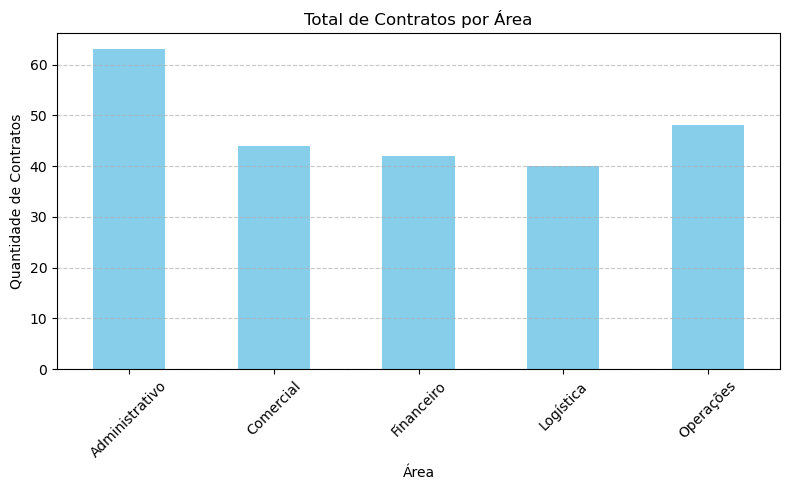

In [13]:
# 5 - Total de Contratos Fechados por Área
servicos_fechados_por_area = servicos_df[['ID Funcionário']].merge(
    funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')

total_contratos_por_area = servicos_fechados_por_area.groupby('Area').size()
print(total_contratos_por_area)

# Visualização
plt.figure(figsize=(8, 5))
total_contratos_por_area.plot(kind='bar', color='skyblue')
plt.title('Total de Contratos por Área')
plt.xlabel('Área')
plt.ylabel('Quantidade de Contratos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64


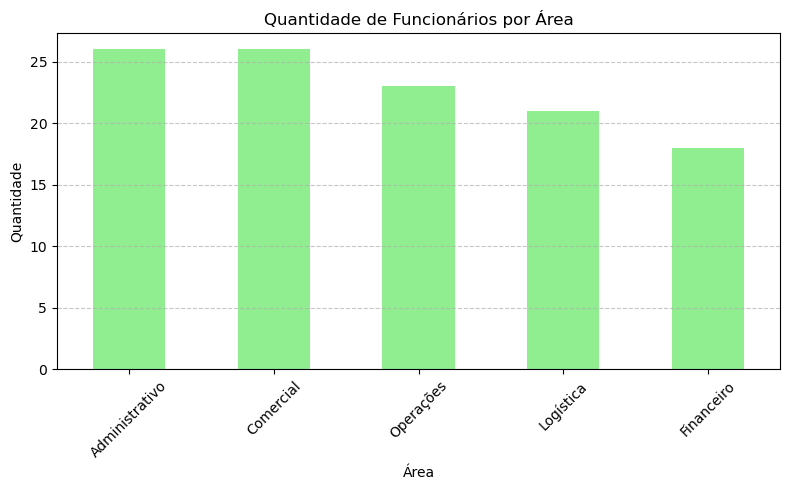

In [11]:
# 6 - Total de Funcionários por Área
qtde_funcionarios_area = funcionarios_df['Area'].value_counts()
print(qtde_funcionarios_area)

# Visualização
plt.figure(figsize=(8, 5))
qtde_funcionarios_area.plot(kind='bar', color='lightgreen')
plt.title('Quantidade de Funcionários por Área')
plt.xlabel('Área')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [7]:
# 7 - Ticket Médio Mensal
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('O ticket médio mensal é de R${:,.2f}'.format(ticket_medio))


O ticket médio mensal é de R$2,502.56


# ✅ Conclusão

A análise permitiu extrair informações valiosas que podem orientar decisões estratégicas da empresa. Entre os insights mais relevantes:

- **Alto engajamento dos funcionários**: mais de 86% dos colaboradores participaram do fechamento de contratos.
- **Concentração de contratos em determinadas áreas**, o que pode indicar especialização ou necessidade de redistribuição.
- **Faturamento total significativo**, com ticket médio mensal acima de R$2,500,00.

Este projeto reforça habilidades de:

- Manipulação de dados com `pandas`
- Integração de múltiplas fontes de dados
- Cálculo de indicadores de negócio
- Comunicação de resultados via código limpo e visualizações

O notebook está estruturado para facilitar leitura e compreensão por recrutadores e profissionais técnicos.
